In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

from matplotlib.pylab import rcParams
rcParams['font.family'] = 'AppleGothic' #영어 <> maigun Gothic(맑은고딕)
rcParams['figure.figsize'] = 17,8

import warnings
warnings.filterwarnings('ignore')

In [3]:
suv = pd.read_csv('suv.csv',encoding='utf-8')
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
# 결측값 제외하고 0,1로 구성된 더미값을 만들어줌 -> 값이 2개 여야 됨, 값이 여러개면 column이 여러개 생성됨
# dummy_na : 결측값도 인코딩해서 처리해줌
suv2 = pd.get_dummies(suv,columns=['Gender'], dummy_na=True)
suv2.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male,Gender_nan
0,15624510,19,19000,0,0,1,0
1,15810944,35,20000,0,0,1,0
2,15668575,26,43000,0,1,0,0
3,15603246,27,57000,0,1,0,0
4,15804002,19,76000,0,0,1,0


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

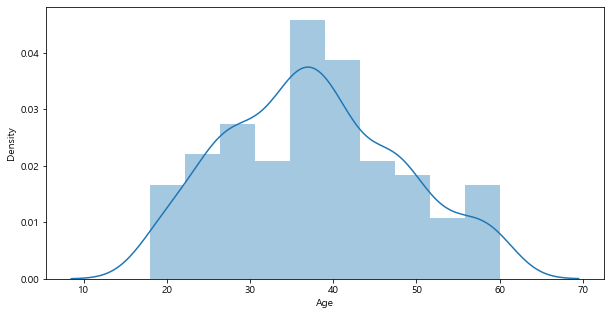

In [12]:
#age변수 분포 확인
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(suv2['Age'])   # 정규분포 확인

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


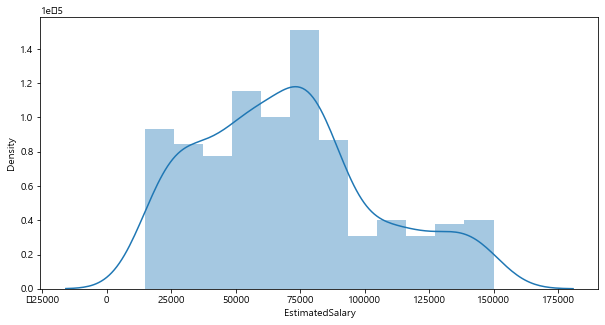

In [13]:
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(suv2['EstimatedSalary'])

In [80]:
titanic = pd.read_csv('titanic.csv', encoding='euc-kr', index_col = 0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [82]:
titanic.shape

(891, 11)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

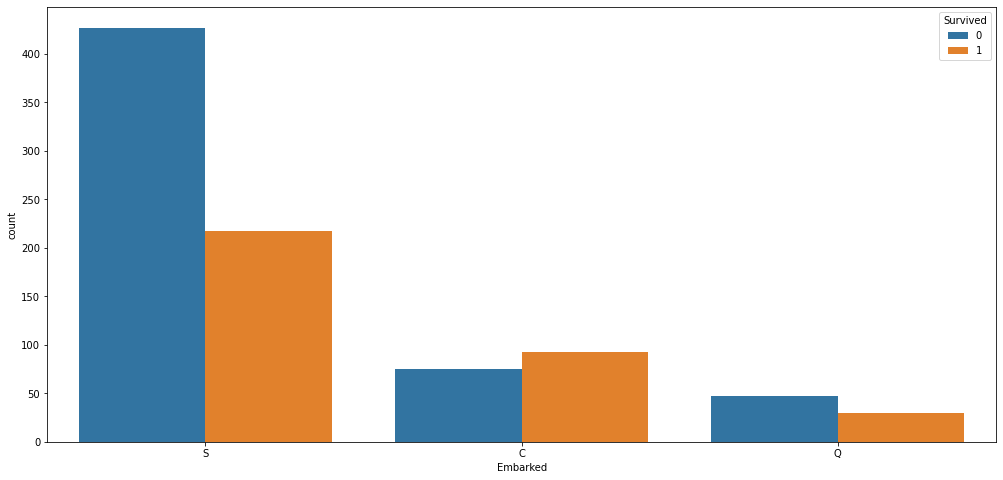

In [83]:
sns.countplot(data=titanic, x='Embarked',hue='Survived')

In [84]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [85]:
titanic[titanic.Embarked == 'S'].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [86]:
titanic.loc[titanic.Embarked.isnull(), 'Embarked']='S'
# titanic.Embarked = titanic.Embarked.fillna('S')

In [87]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [88]:
# 승선 위치마다 승객이 몇 명 탔을까? %로 나타내기 
titanic['Embarked'].value_counts()*100 / titanic['Embarked'].value_counts().sum()
# titanic['Embarked'].value_counts()*100 / titanic.shape[0]


S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

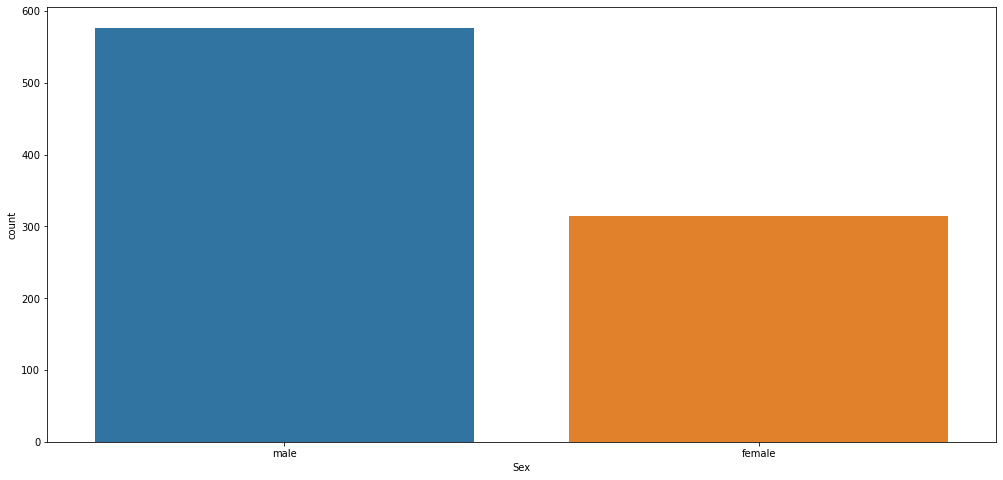

In [89]:
sns.countplot(data=titanic, x='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

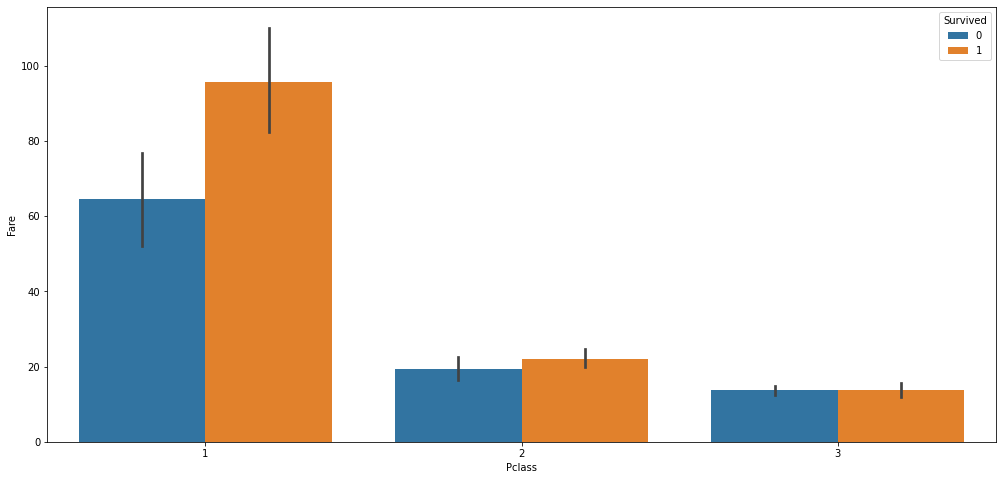

In [90]:
sns.barplot(data=titanic, x='Pclass', y='Fare', hue='Survived')

In [91]:
titanic.loc[titanic.Fare >= 500, 'Fare'] = titanic[titanic.Fare >= 500]['Fare'] / 3

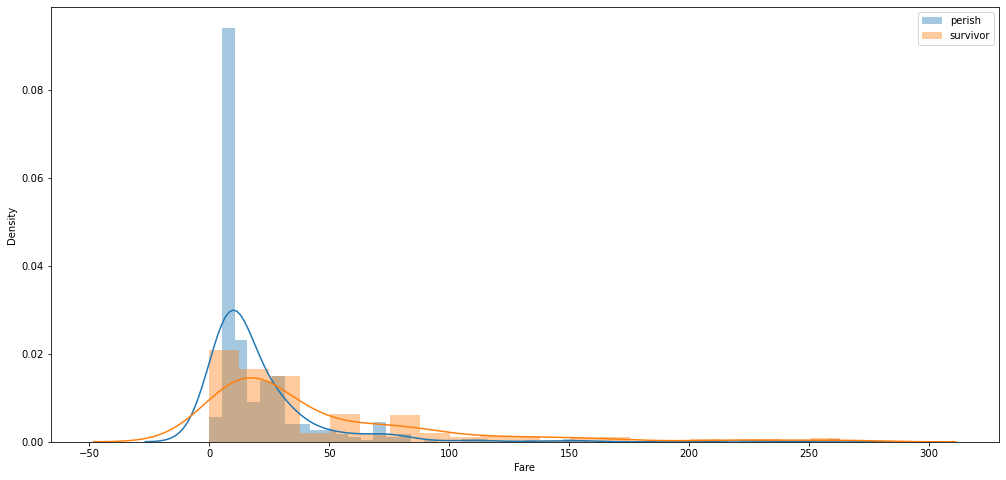

In [92]:
perish = titanic[titanic.Survived == 0]
survivor = titanic[titanic.Survived == 1]

sns.distplot(perish.Fare, label='perish')
sns.distplot(survivor.Fare, label='survivor')
plt.legend()

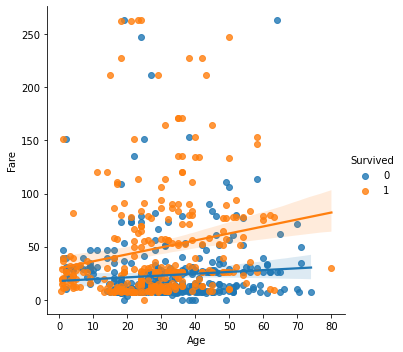

In [93]:
sns.lmplot(data=titanic, x='Age',y='Fare', hue='Survived')

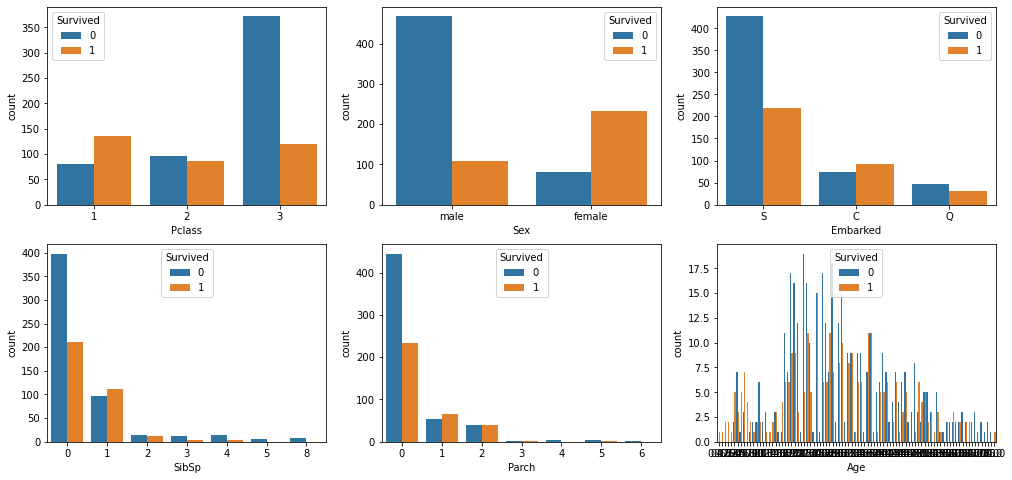

In [94]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
sns.countplot(data=titanic, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=titanic, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=titanic, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=titanic, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=titanic, x='Parch', hue='Survived', ax=ax5)
sns.countplot(data=titanic, x='Age', hue='Survived', ax=ax6)

plt.savefig('titanic.pdf')

In [95]:
titanic['Family_size'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [97]:
titanic.loc[titanic.Family_size == 0, 'Alone'] = 0
titanic.loc[titanic.Family_size != 0, 'Alone'] = 1
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.0


In [79]:
titanic.Alone.unique()

array([0], dtype=int64)

<AxesSubplot:xlabel='Family_size', ylabel='count'>

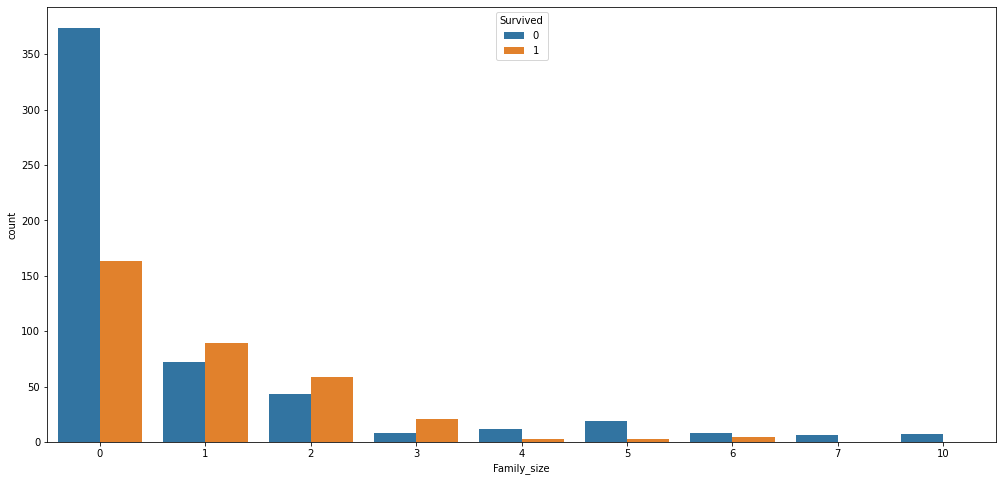

In [65]:
sns.countplot(data=titanic,x='Family_size',hue='Survived')